Pizza Sales Analysis

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

Import Data

In [8]:
df=pd.read_csv("G:/DA/Projects/Python Pizza Sales Analysis/pizza_sales.csv")

Dataset Info

In [9]:
print("The Info of Dataset:",df.shape)

The Info of Dataset: (48620, 12)


In [10]:
print("The Rows of Dataset:",df.shape[0])

The Rows of Dataset: 48620


In [11]:
print("The Columns of Dataset:",df.shape[1])

The Columns of Dataset: 12


In [12]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


Data Types

In [14]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [15]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


key performance Indicators

In [16]:
Total_revenue=df['total_price'].sum()
Total_Pizzas_sold=df['quantity'].sum()
Total_orders=df['order_id'].nunique()
Average_order_value=Total_revenue/Total_orders
Average_pizza_per_order=Total_Pizzas_sold/Total_orders


print(f"Total Revenue:${Total_revenue:,.2f}")
print(f"Total Pizzas Sold:${Total_Pizzas_sold:,}")
print(f"Total Orders:${Total_orders:,}")
print(f"Average Order value:${Average_order_value:,.2f}")
print(f"Average pizza per Order:${Average_pizza_per_order:,.2f}")

Total Revenue:$817,860.05
Total Pizzas Sold:$49,574
Total Orders:$21,350
Average Order value:$38.31
Average pizza per Order:$2.32


Ingredient Analysis

In [17]:
Ingredient=(df['pizza_ingredients']
.str.split(',')
.explode()
.str.strip()
.value_counts()
.reset_index()
.rename(columns={'index':'Count','pizza_ingredients':'Ingredient'}))
print(Ingredient)
print(Ingredient.head(5))

            Ingredient  count
0               Garlic  27422
1             Tomatoes  26601
2           Red Onions  19547
3          Red Peppers  16284
4    Mozzarella Cheese  10333
..                 ...    ...
60   Brie Carre Cheese    480
61          Prosciutto    480
62  Caramelized Onions    480
63               Pears    480
64               Thyme    480

[65 rows x 2 columns]
          Ingredient  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333


Total Orders - Daily Trend

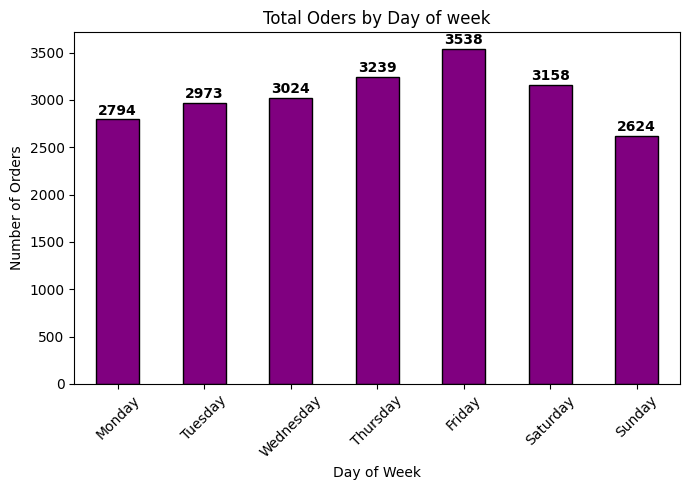

In [18]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
df['day_name']=df['order_date'].dt.day_name()

weekday_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['Weekday_order']=pd.Categorical(df['day_name'],categories=weekday_order,ordered=True)

Orders_by_day=df.groupby('Weekday_order',observed=False)['order_id'].nunique()
a=Orders_by_day.plot(kind='bar',figsize=(7,5),color='purple',edgecolor='black')

plt.title("Total Oders by Day of week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i,val in enumerate(Orders_by_day):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

Total Revenue - Daily Trend

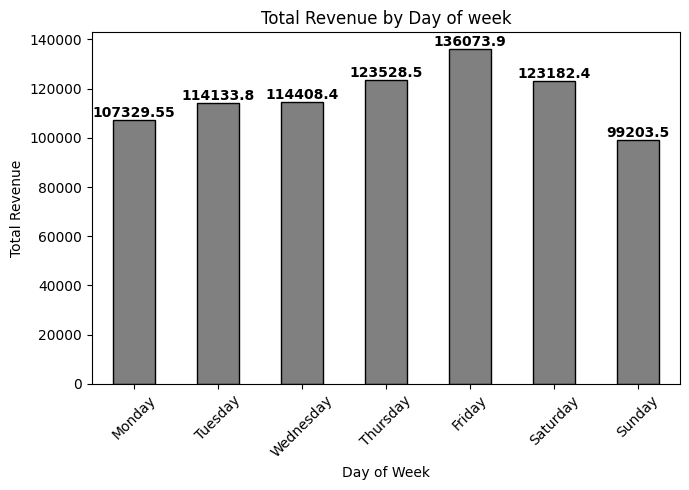

In [19]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
df['day_name']=df['order_date'].dt.day_name()

weekday_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['Weekday_order']=pd.Categorical(df['day_name'],categories=weekday_order,ordered=True)

Orders_by_day=df.groupby('Weekday_order',observed=False)['total_price'].sum()
a=Orders_by_day.plot(kind='bar',figsize=(7,5),color='grey',edgecolor='black')

plt.title("Total Revenue by Day of week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i,val in enumerate(Orders_by_day):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

Total Quantity - Daily Trend

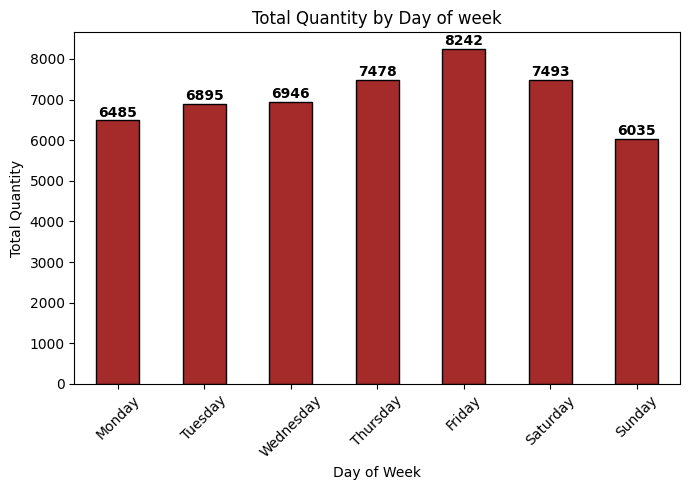

In [20]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
df['day_name']=df['order_date'].dt.day_name()

weekday_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['Weekday_order']=pd.Categorical(df['day_name'],categories=weekday_order,ordered=True)

Orders_by_day=df.groupby('Weekday_order',observed=False)['quantity'].sum()
a=Orders_by_day.plot(kind='bar',figsize=(7,5),color='brown',edgecolor='black')

plt.title("Total Quantity by Day of week")
plt.xlabel("Day of Week")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)

for i,val in enumerate(Orders_by_day):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

Total Revenue - Hourly Trend

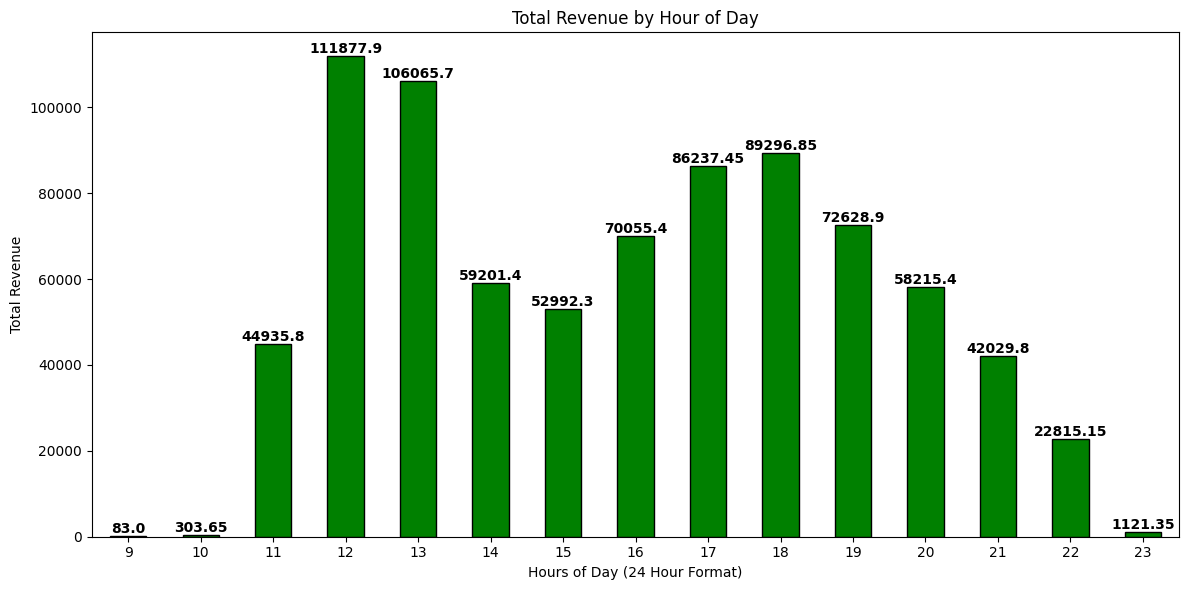

In [74]:
df['order_time']=pd.to_datetime(df['order_time'],format='%H:%M:%S')
df['order_hour']=df['order_time'].dt.hour

Orders_by_hour=df.groupby('order_hour',observed=False)['total_price'].sum()
a=Orders_by_hour.plot(kind='bar',figsize=(12,6),color='green',edgecolor='black')

plt.title("Total Revenue by Hour of Day")
plt.xlabel("Hours of Day (24 Hour Format)")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)

for i,val in enumerate(Orders_by_hour):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

Total Orders - Hourly Trend

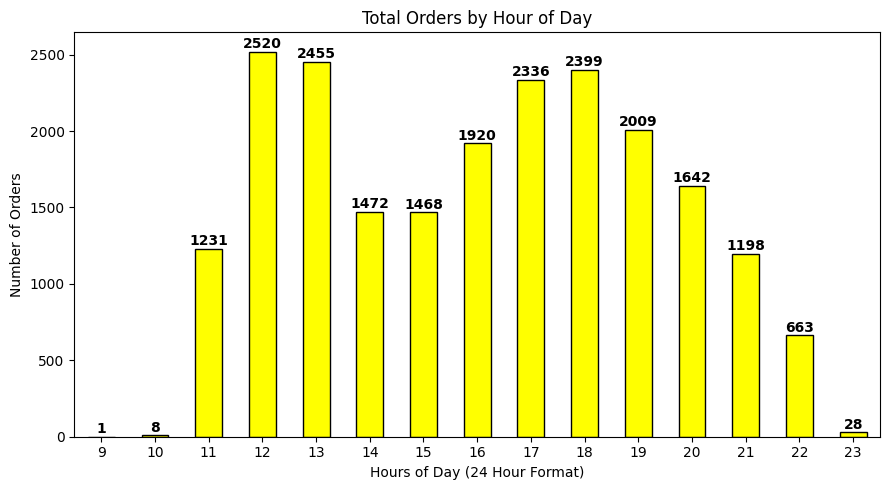

In [22]:
df['order_time']=pd.to_datetime(df['order_time'],format='%H:%M:%S')
df['order_hour']=df['order_time'].dt.hour

Orders_by_hour=df.groupby('order_hour',observed=False)['order_id'].nunique()
a=Orders_by_hour.plot(kind='bar',figsize=(9,5),color='yellow',edgecolor='black')

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hours of Day (24 Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i,val in enumerate(Orders_by_hour):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

Total Sales - Hourly Trend

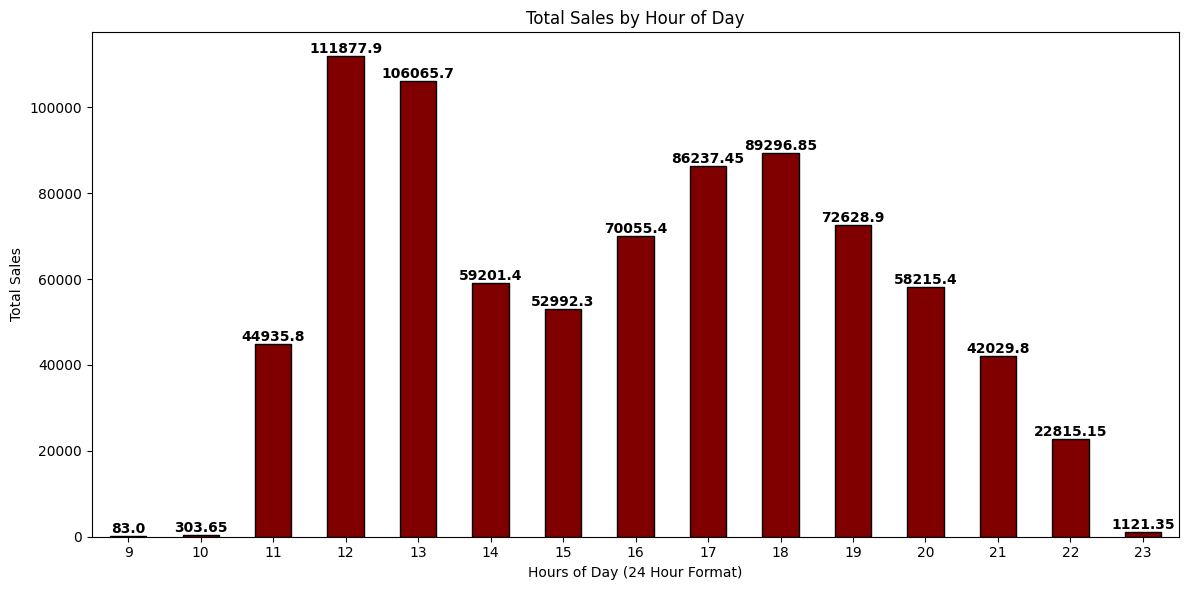

In [23]:
df['order_time']=pd.to_datetime(df['order_time'],format='%H:%M:%S')
df['order_hour']=df['order_time'].dt.hour

df['total_price']=df['quantity']*df['unit_price']
Orders_by_hour=df.groupby('order_hour',observed=False)['total_price'].sum()
a=Orders_by_hour.plot(kind='bar',figsize=(12,6),color='maroon',edgecolor='black')

plt.title("Total Sales by Hour of Day")
plt.xlabel("Hours of Day (24 Hour Format)")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)

for i,val in enumerate(Orders_by_hour):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

Total Orders - Monthly Trend

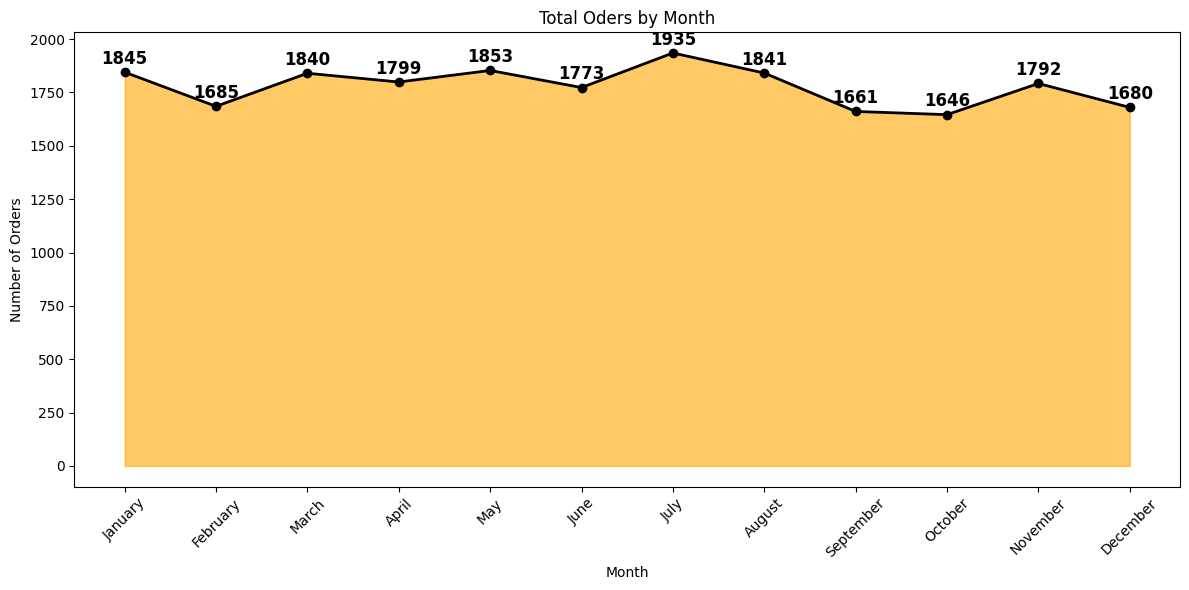

In [24]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
df['month_name']=df['order_date'].dt.month_name()

month_order=["January","February","March","April","May","June","July","August","September","October","November","December"]
df['month_name']=pd.Categorical(df['month_name'],categories=month_order,ordered=True)

Orders_by_month=df.groupby('month_name',observed=False)['order_id'].nunique()

plt.figure(figsize=(12,6))
plt.fill_between(Orders_by_month.index,Orders_by_month.values,color="orange",alpha=0.6)
plt.plot(Orders_by_month.index,Orders_by_month.values,color='black',linewidth=2,marker='o')

plt.title("Total Oders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i,val in enumerate(Orders_by_month):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()

Percentage of Sales by Category

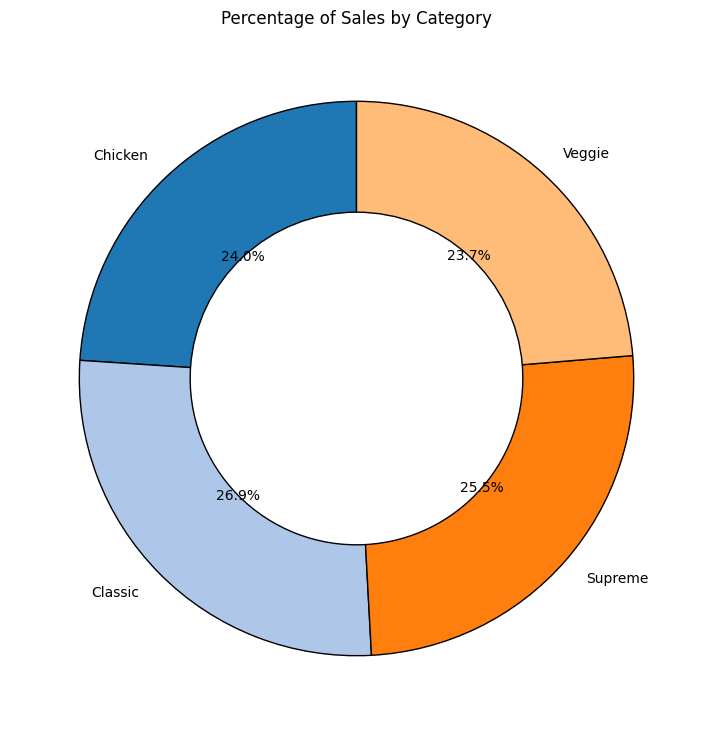

In [25]:
category_sales=df.groupby('pizza_category')['total_price'].sum()

category_pct=category_sales/category_sales.sum()*100

plt.figure(figsize=(9,9))
colors=plt.get_cmap('tab20').colors

plt.pie(category_pct,labels=category_pct.index,autopct='%1.1f%%',startangle=90,colors=colors,wedgeprops={'edgecolor':'black','width':0.4})
plt.title("Percentage of Sales by Category")
plt.show()

Percentage of Sales by Size & Category

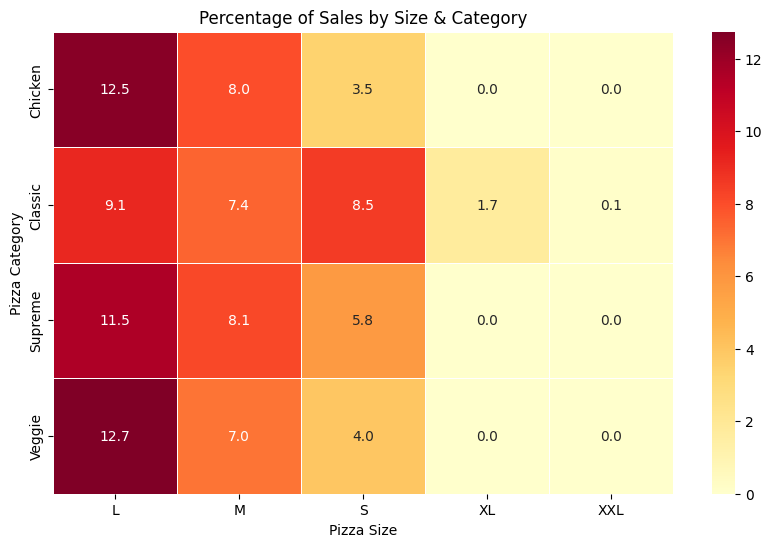

In [26]:
sales_pivot=df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pct=sales_pivot/sales_pivot.sum().sum()*100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct,annot=True,fmt=".1f",cmap="YlOrRd",linewidths=0.5)
plt.title("Percentage of Sales by Size & Category")
plt.xlabel("Pizza Size")
plt.ylabel("Pizza Category")
plt.show()

Total Pizza Sold by Pizza Category

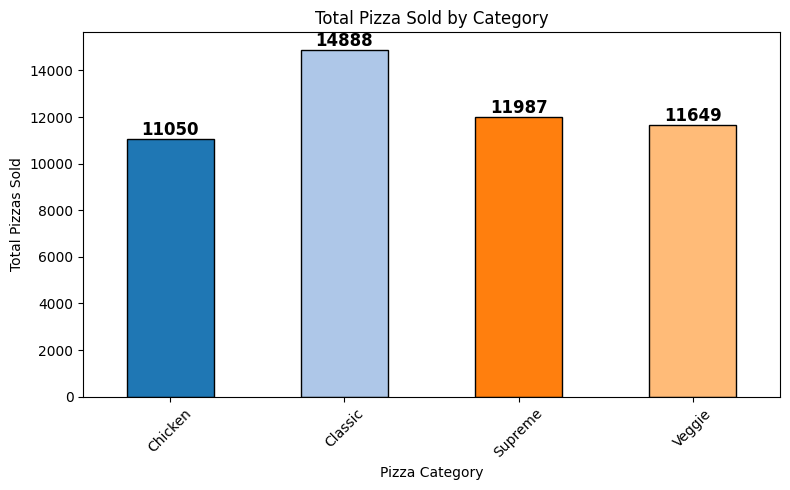

In [27]:
pizzas_by_category=df.groupby('pizza_category')['quantity'].sum()

colors=list(plt.get_cmap('tab20').colors)
colors=colors[:len(pizzas_by_category)]

a=pizzas_by_category.plot(kind='bar',figsize=(8,5),color=colors,edgecolor='black')

plt.title("Total Pizza Sold by Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i,val in enumerate(pizzas_by_category):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()  

Top 5 Best Selling Pizzas - Total Quantity

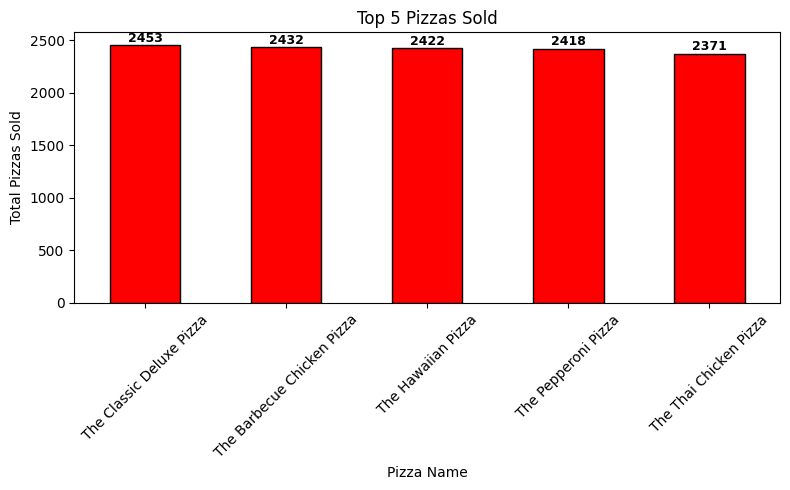

In [49]:
pizzas_by_name=df.groupby('pizza_name')['quantity'].sum()

top5=pizzas_by_name.sort_values(ascending=False).head(5)

a=top5.plot(kind='bar',figsize=(8,5),color='red',edgecolor='black')

plt.title("Top 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i,val in enumerate(top5):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()   

Top 5 Best Selling Pizzas - Total Orders

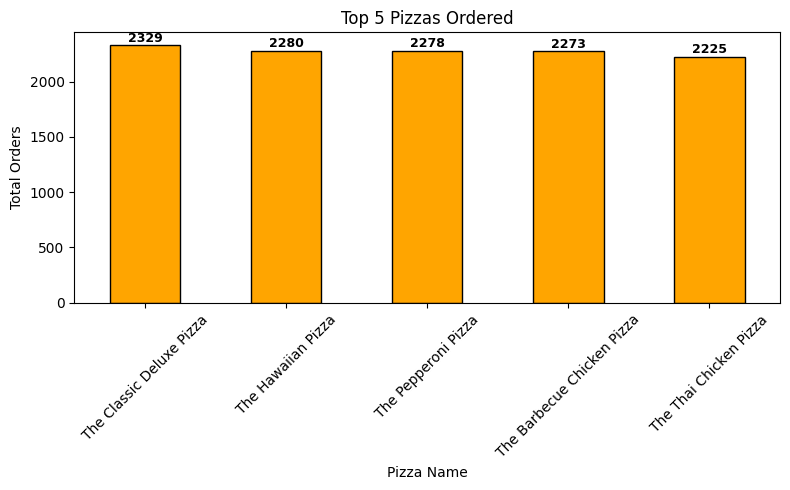

In [73]:
pizzas_by_name=df.groupby('pizza_name')['order_id'].nunique()

top5=pizzas_by_name.sort_values(ascending=False).head(5)

a=top5.plot(kind='bar',figsize=(8,5),color='orange',edgecolor='black')

plt.title("Top 5 Pizzas Ordered")
plt.xlabel("Pizza Name")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)

for i,val in enumerate(top5):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()   

Top 5 Best Selling Pizzas - Total Sales

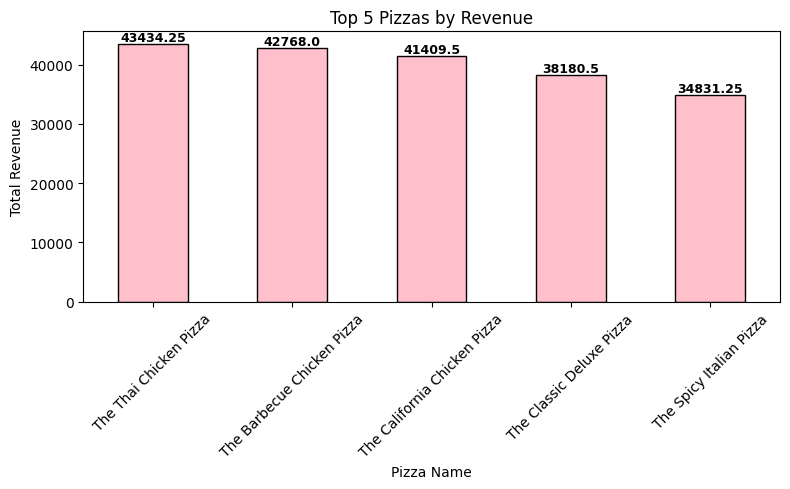

In [72]:
pizzas_by_name=df.groupby('pizza_name')['total_price'].sum()

top5=pizzas_by_name.sort_values(ascending=False).head(5)

a=top5.plot(kind='bar',figsize=(8,5),color='pink',edgecolor='black')

plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i,val in enumerate(top5):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()   

Bottom 5 Selling Pizzas - Total Quantity

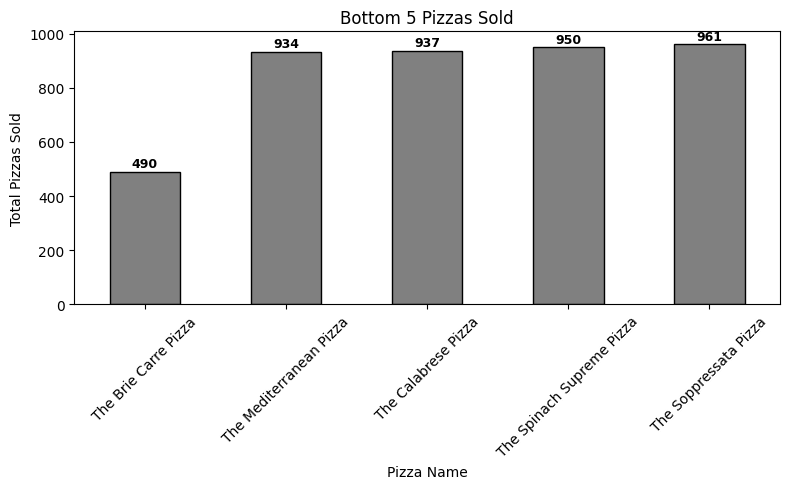

In [65]:
pizzas_by_name=df.groupby('pizza_name')['quantity'].sum()

bottom5=pizzas_by_name.sort_values(ascending=True).head(5)

a=bottom5.plot(kind='bar',figsize=(8,5),color='grey',edgecolor='black')

plt.title("Bottom 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i,val in enumerate(bottom5):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()   

Bottom 5 Best Selling Pizzas - Total Sales

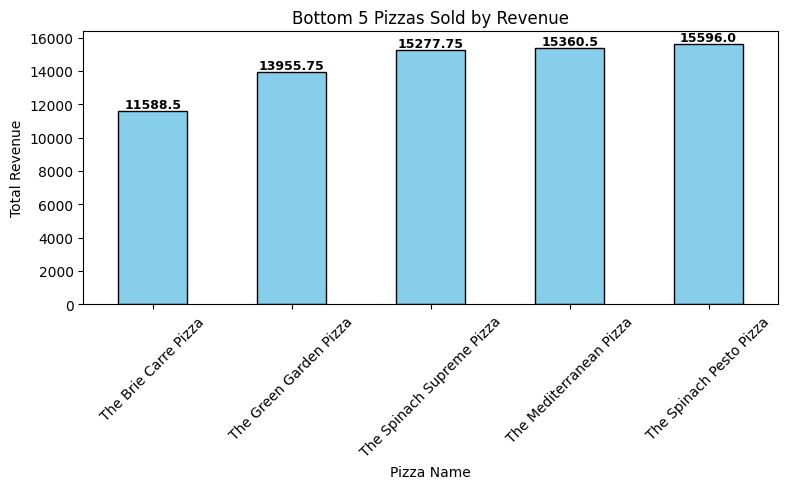

In [71]:
pizzas_by_name=df.groupby('pizza_name')['total_price'].sum()

bottom5=pizzas_by_name.sort_values(ascending=True).head(5)

a=bottom5.plot(kind='bar',figsize=(8,5),color='skyblue',edgecolor='black')

plt.title("Bottom 5 Pizzas Sold by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i,val in enumerate(bottom5):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()   

Bottom 5 Best Selling Pizzas - Total Orders

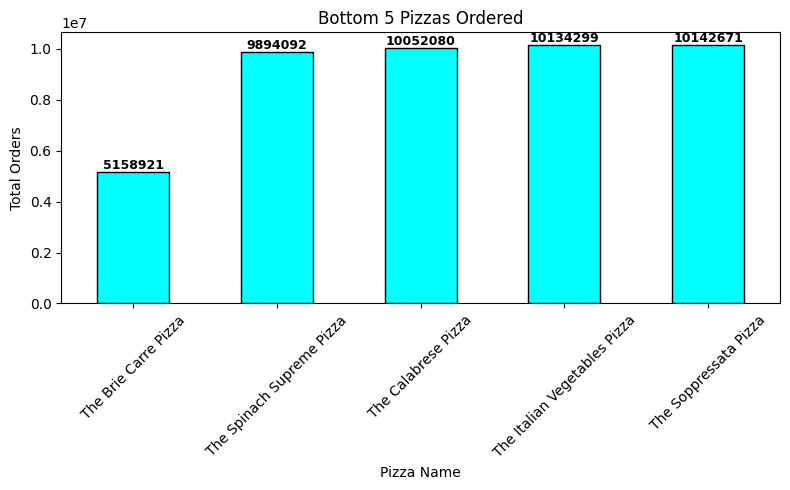

In [79]:
pizzas_by_name=df.groupby('pizza_name')['order_id'].sum()

bottom5=pizzas_by_name.sort_values(ascending=True).head(5)

a=bottom5.plot(kind='bar',figsize=(8,5),color='cyan',edgecolor='black')

plt.title("Bottom 5 Pizzas Ordered")
plt.xlabel("Pizza Name")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)

for i,val in enumerate(bottom5):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()   